![alt text](https://www.msengineering.ch/typo3conf/ext/nm_theme_msengineering/Resources/Public/Template/img/mse_logo.jpg "MSE Logo") 

# AnTeDe Practical Work 1c : A New Document

## Start over with a new example: Web page 
**Redo the same operations** as in the previous notebook (Lab 1b) using this time a Wikipedia page (i.e. in HTML, not raw text format).  The content and even language are your choice, but we suggest using the English Wikipedia page on Switzerland.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

With inspiration from [Chapter 3 of the NLTK book](http://www.nltk.org/book/ch03.html), write the instruction for performing a request to obtain the file found at `url2`.  What is the length of the resulting string?

In [2]:
from urllib import request 
# refer to the NLTK book Ch. 3, for dealing with HTML
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response2 = request.urlopen(url2)
html2 = response2.read().decode('utf8')
print(len(html2))

803597


Using the `BeautifulSoup` Python package, please extract the text from the HTML page.  (Assuming the entire page is stored in `html2`, the text will be extracted in `raw2`.)

In [3]:
from bs4 import BeautifulSoup

In [4]:
raw2 = BeautifulSoup(html2).get_text()
print(raw2)




Switzerland - Wikipedia

































Switzerland

From Wikipedia, the free encyclopedia



Jump to navigation
Jump to search
Federal republic in Central Europe
This article is about the sovereign state. For other uses, see Switzerland (disambiguation) and Swiss Confederation (disambiguation).



Swiss Confederation
5 other official names

Schweizerische Eidgenossenschaft  (German)Confédération suisse  (French)Confederazione Svizzera  (Italian)Confederaziun svizra  (Romansh)Confoederatio Helvetica  (Latin)





Flag



 Coat of arms

Motto: (traditional)"Unus pro omnibus, omnes pro uno" (Latin)"One for all, all for one"Anthem: "Swiss Psalm"Location of Switzerland (green)in Europe (green and dark grey)Capital
None (de jure)
Bern (de facto)[note 1][1][2]
46°57′N 7°27′E﻿ / ﻿46.950°N 7.450°E﻿ / 46.950; 7.450Largest cityZürichOfficial languages
German
French
Italian
Recognised national languagesRomanshReligion  (2018[3])65.5% Christianity—35.8% Roman Catholic—23.8% Swi

Please reuse the technique from the previous notebook (Lab 1b) to trim the beginning and end of the string `raw2`, removing the text which is not logically part of the Wikipedia article.  How long is the resulting text?  Please display a fragment from the start and one from the end (calling it e.g. `raw2trimmed`).

In [5]:
# Please write your Python code below and execute it.
import re
end_pos = [o.start() for o in re.finditer('See also', raw2)]
end_pos.sort(reverse=True)
start_pos = [o.start() for o in re.finditer('Switzerland', raw2)]
raw2trimmed = raw2[start_pos[4]:end_pos[0]]

print('len of text: %s' % len(raw2trimmed))
print(raw2trimmed)

len of text: 97907
Switzerland, officially the Swiss Confederation, is a country situated at the confluence of Western, Central, and Southern Europe.[note 4][13] It is a federal republic composed of 26 cantons, with federal authorities based in Bern.[note 1][2][1] Switzerland is a landlocked country bordered by Italy to the south, France to the west, Germany to the north, and Austria and Liechtenstein to the east. It is geographically divided among the Swiss Plateau, the Alps, and the Jura, spanning a total area of 41,285 km2 (15,940 sq mi), and land area of 39,997 km2 (15,443 sq mi). While the Alps occupy the greater part of the territory, the Swiss population of approximately 8.5 million is concentrated mostly on the plateau, where the largest cities and economic centres are located, among them Zürich, Geneva and Basel. These cities are home to several offices of international organisations such as the headquarters of FIFA, the UN's second-largest Office, and the main building of the

Segment the text into sentence, then tokenize each sentence.  Write the result (one sentence per line, whitespaces between tokens) in a file called `sample_web_page.txt` and open it using a text editor.  Do you see any mistakes?  Can you clean some of them?

In [6]:
filename = "sample_web_page.txt"
# For a local file, this is the relative path with respect to the notebook
# For Google Colab, use e.g.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Please write your Python code below and execute it.

# further cleaning
raw2trimmed = re.sub('\[.*\]', '', raw2trimmed)

# tokenizing
sentences = nltk.sent_tokenize(raw2trimmed)
tokens = [nltk.word_tokenize(sent) for sent in sentences]
for token in tokens:
    fd.write(' '.join(token) + '\n')
fd.close()

Now tokenize the initial string without performing sentence segmentation, and store the result as e.g. `words2` without writing it in a file.  How many tokens are there in this text?

In [7]:
# Please write your Python code below and execute it.
import numpy as np
words2 = nltk.word_tokenize(raw2trimmed)
len(words2), len(np.sum(tokens))

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(12184, 12184)

Please create again an `nltk.Text`object from the list of tokens called `words2`.  Apply to it the functions: `concordance`, `similar` and `collocations`. 

In [8]:
# Please write your Python code below and execute it.
txt_obj = nltk.Text(words2)
txt_obj.similar('canton')

north city government constitution swiss confederation country
confluence west alps jura area part territory population home
headquarters building establishment peace


In [9]:
txt_obj.concordance('canton')

Displaying 17 of 17 matches:
iiz , is homophonous to that of the canton and the settlement , but distinguis
of States , two representatives per canton ) and a lower house ( the National 
Rail Tunnel connecting the southern canton of Ticino , the longest in the worl
 in the high Alps and in the Ticino canton which has much sun yet heavy bursts
 46 representatives ( two from each canton and one from each half-canton ) who
d under a system determined by each canton , and the National Council , which 
depending on the population of each canton . Members of both houses serve for 
federation consists of 26 cantons : Canton ID Capital Canton ID Capital Aargau
s of 26 cantons : Canton ID Capital Canton ID Capital Aargau 19 Aarau * Nidwal
on constitutional amendments . Each canton has its own constitution , and its 
gative aspects for the city and the canton of Bern if this status were awarded
hat year ; however , the regional ( canton ) budgets and the budgets of the mu
majority ( 69.2 % appro

In [10]:
txt_obj.collocation_list()[:10]

[('Main', 'article'),
 ('United', 'Nations'),
 ('St.', 'Gallen'),
 ('Main', 'articles'),
 ('European', 'Union'),
 ('Swiss', 'Confederacy'),
 ('Federal', 'Council'),
 ('Helvetic', 'Republic'),
 ('Old', 'Swiss'),
 ('Federal', 'Assembly')]

Please compute the vocabulary of your text, as in 1b.  How many (different) words does it contain?  (This includes punctuations and other marks identified in tokenization.  Capitals are different from low-case.)  Which words of more than 15 letters do appear in the vocabulary?

In [11]:
# Please write your Python code below and execute it.
voci = set(words2)
fifeteen_higher = [word for word in words2 if len(word) > 15]
print(len(voci))
print(len(fifeteen_higher))

3214
24


Build a `FreqDist` object with the words from this page, by lowercasing all words that contain only letters (to find them, use the `.isalpha()` method in Python).  What are the 30 most frequent words?

In [12]:
# Please write your Python code below and execute it.
words_cleaned = [word.lower() for word in words2 if word.isalpha()]
freq_dist = nltk.FreqDist(words_cleaned)
freq_dist.most_common(30)

[('the', 939),
 ('of', 474),
 ('and', 359),
 ('in', 332),
 ('switzerland', 177),
 ('to', 159),
 ('a', 155),
 ('swiss', 147),
 ('is', 111),
 ('are', 82),
 ('for', 76),
 ('as', 75),
 ('federal', 75),
 ('was', 68),
 ('by', 61),
 ('from', 59),
 ('with', 54),
 ('has', 47),
 ('world', 45),
 ('on', 44),
 ('at', 43),
 ('an', 40),
 ('it', 38),
 ('which', 36),
 ('main', 35),
 ('cantons', 35),
 ('also', 33),
 ('country', 32),
 ('international', 31),
 ('its', 30)]

Please display the cumulative plot of the number of occurrences of words, limited to the 70 most frequent ones.

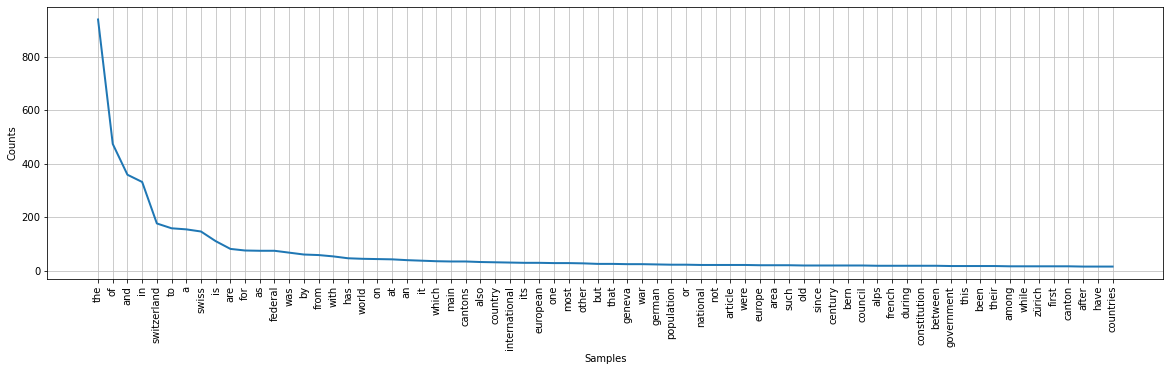

In [13]:
# Please write your Python code below and execute it.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
freq_dist.plot(70)
plt.show()

Can you build a list with the length of each word (instead of the word), then use this list to create a new `FreqDist` object, and plot the frequency distribution?  (Not the cumulative one.)  What is the most frequent length?  What can you observe about the ordering of the lengths by decreasing frequency?

[(3, 2112)]


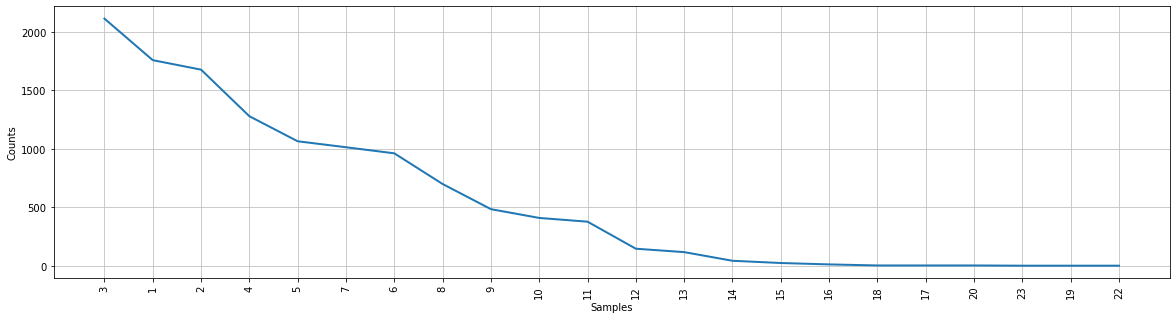

In [14]:
# Please write your Python code below and execute it.
word_lengths = [len(word) for word in words2]
freq_dist_word_length = nltk.FreqDist(word_lengths)
print(freq_dist_word_length.most_common(1))
plt.figure(figsize=(20,5))
freq_dist_word_length.plot(70)
plt.show()

**Zipf's Law.** As in Lab 1b, please produce a list of the number of occurrences of each word, in decreasing order, then plot (for about 100 ranks) the number of occurrences on the *y&nbsp;* axis and the rank of each value (1st, 2nd, 3rd, ...) on the *x&nbsp;* axis.  Add a curve of the shape *y = a/(x+b)*, trying to fit *a&nbsp;* and *b&nbsp;* as close as you can so that the two curves look superposed.

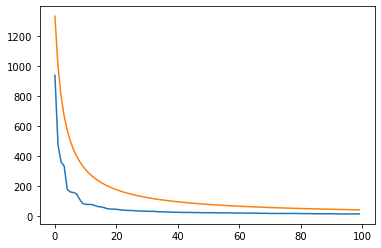

In [15]:
# Please write your Python code in this cell and execute it.
n_occurence = [word[1] for word in freq_dist.most_common(100)]
n_occurence.sort(reverse=True)
one_over_x = [4000/(x+3) for x in range(100)]
plt.plot(range(100), n_occurence, one_over_x)

## End of Lab 1c
Now please prepare a one-page lab report and submit it on the Moodle page.